In [124]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

In [41]:
lemonade = pd.read_csv("lemonade.csv")

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [42]:
def get_lower_and_upper_bounds(series, multiplier=1.5):
    q1 = series.quantile(.25)
    q3 = series.quantile(.75)
    iqr = q3-q1
    
    lower_fence = q1 - (multiplier*iqr)
    upper_fence = q3 + (multiplier*iqr)
    return lower_fence, upper_fence

_Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?_

In [43]:
temp_lf, temp_uf = get_lower_and_upper_bounds(lemonade["Temperature"])
rainfall_lf, rainfall_uf = get_lower_and_upper_bounds(lemonade["Rainfall"])
flyers_lf, flyers_uf = get_lower_and_upper_bounds(lemonade["Flyers"])
price_lf, price_uf = get_lower_and_upper_bounds(lemonade["Price"])
sales_lf, sales_uf = get_lower_and_upper_bounds(lemonade["Sales"])

In [44]:
print(f"""
Temperature Lower Fence: {temp_lf}
Temperature Upper Fence: {temp_uf}

Rainfall Lower Fence: {rainfall_lf}
Rainfall Upper Fence: {rainfall_uf}

Flyers Lower Fence: {flyers_lf}
Flyers Upper Fence: {flyers_uf}

Price Lower Fence: {price_lf}
Price Upper Fence: {price_uf}

Sales Lower Fence: {sales_lf}
Sales Upper Fence: {sales_uf}
""")


Temperature Lower Fence: 16.700000000000003
Temperature Upper Fence: 104.7

Rainfall Lower Fence: 0.26
Rainfall Upper Fence: 1.3

Flyers Lower Fence: 4.0
Flyers Upper Fence: 76.0

Price Lower Fence: 0.5
Price Upper Fence: 0.5

Sales Lower Fence: 5.0
Sales Upper Fence: 45.0



Price have the the same lower and upper bound which leads me to concluding that the price have little to no variation. These outliers should be kept.

_Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?_

In [45]:
temp_lf, temp_uf = get_lower_and_upper_bounds(lemonade["Temperature"],3)
rainfall_lf, rainfall_uf = get_lower_and_upper_bounds(lemonade["Rainfall"],3)
flyers_lf, flyers_uf = get_lower_and_upper_bounds(lemonade["Flyers"],3)
price_lf, price_uf = get_lower_and_upper_bounds(lemonade["Price"],3)
sales_lf, sales_uf = get_lower_and_upper_bounds(lemonade["Sales"],3)

In [46]:
print(f"""
Temperature Lower Fence: {temp_lf}
Temperature Upper Fence: {temp_uf}

Rainfall Lower Fence: {rainfall_lf}
Rainfall Upper Fence: {rainfall_uf}

Flyers Lower Fence: {flyers_lf}
Flyers Upper Fence: {flyers_uf}

Price Lower Fence: {price_lf}
Price Upper Fence: {price_uf}

Sales Lower Fence: {sales_lf}
Sales Upper Fence: {sales_uf}
""")


Temperature Lower Fence: -16.299999999999997
Temperature Upper Fence: 137.7

Rainfall Lower Fence: -0.13
Rainfall Upper Fence: 1.69

Flyers Lower Fence: -23.0
Flyers Upper Fence: 103.0

Price Lower Fence: 0.5
Price Upper Fence: 0.5

Sales Lower Fence: -10.0
Sales Upper Fence: 60.0



Some of the negative values do not make sense contextually. For instance, flyers cannot be negative because it has an absolute 0. We cannot give away negative flyers. Also, negative sales only make sense for profit and loss but not in our particular data set.

_Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?_

In [52]:
lemonade[lemonade["Temperature"] > temp_uf]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


Temperature above 212 does not make sense on any given day with 0.91 rainfall and with sales. It makes me think it is a clerical error.

In [53]:
lemonade[lemonade["Rainfall"] > rainfall_uf]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


I want to say that this data makes sense because the days are in the Winter so it is likely that these are heavily pouring days. Also, if we glanced at the sales and day, it seems like they're relatively low. 

Let me confirm this by comparing Sales by Days and get the average/median Rainfall.

In [62]:
lemonade.groupby("Day")["Sales","Rainfall"].agg(["mean","median"])

Sales         Rainfall       
                mean median      mean median
Day                                         
Friday     25.384615   25.5  0.817115   0.74
Monday     29.307692   25.0  0.823462   0.74
Saturday   26.500000   25.0  0.823077   0.77
Sunday     24.830189   25.0  0.873585   0.74
Thursday   25.673077   25.0  0.812500   0.77
Tuesday    34.750000   25.0  0.829423   0.74
Wednesday  26.730769   25.0  0.801731   0.77

Sunday is the day with least sales, and the median sales is 25. So the extreme outliers in the Rainfall makes sense.

In [54]:
lemonade[lemonade["Flyers"] > flyers_uf]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [55]:
lemonade[lemonade["Price"] > price_uf]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


There are no extreme upper outliers in Flyers and Price.

In [56]:
lemonade[lemonade["Sales"] > sales_uf]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534
185,7/5/17,Wednesday,93.0,0.40,55,0.5,99
258,9/16/17,Saturday,68.1,0.69,37,0.5,87


In [64]:
lemonade["Flyers"].median()

39.0

On a hot day, the extreme upper outliers make sense.

Perhaps there is an event where a huge group of people came in to get lemonade. Or they had a marketing push because the sales outliers happened on three consecutive  days.

The median outlier is 39, and the days with increased Sales show that there are more flyers distributed than normal.

---

Identify if any columns in lemonade.csv are normally distributed.

For normally distributed columns:
- Use a 2 sigma decision rule to isolate the outliers.

Do these make sense? Should certain outliers be kept or removed?

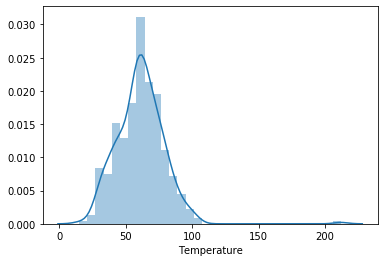

In [121]:
sns.distplot(lemonade["Temperature"])

In [220]:
temperature = pd.DataFrame(lemonade["Temperature"])
temperature["mean"] = temperature["Temperature"].mean()
temperature["centered"] = temperature["Temperature"] - temperature["mean"]

$2\sigma$ on Temperature

In [235]:
temp2sig = temperature.centered.std()*2
temp2sig_inlier = temperature[(temperature.centered <= temp2sig) | (temperature.centered <= temp2sig*-1)]
temp2sig_outlier = temperature[~(temperature.centered <= temp2sig) | (temperature.centered <= temp2sig*-1)]

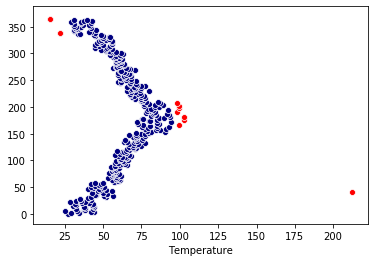

In [244]:
sns.scatterplot(x=temp2sig_inlier["Temperature"], y= temp2sig_inlier.index, color="navy")
sns.scatterplot(x=temp2sig_outlier["Temperature"], y= temp2sig_outlier.index, color="red")

$3\sigma$ on Temperature

In [241]:
temp3sig = temperature.centered.std()*3
temp3sig_inlier = temperature[(temperature.centered <= temp3sig) | (temperature.centered <= temp3sig*-1)]
temp3sig_outlier = temperature[~(temperature.centered <= temp3sig) | (temperature.centered <= temp3sig*-1)]

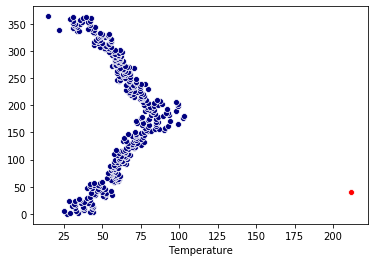

In [245]:
sns.scatterplot(x=temp3sig_inlier["Temperature"], y= temp3sig_inlier.index, color="navy")
sns.scatterplot(x=temp3sig_outlier["Temperature"], y= temp3sig_outlier.index, color="red")

In [226]:
flyers2sig = flyers.centered.std()*2
flyers2sig_inlier = flyers[(flyers.centered <= flyers2sig) | (flyers.centered <= flyers2sig*-1)]
flyers2sig_outlier = flyers[~(flyers.centered <= flyers2sig) | (flyers.centered >= flyers2sig*-1)]

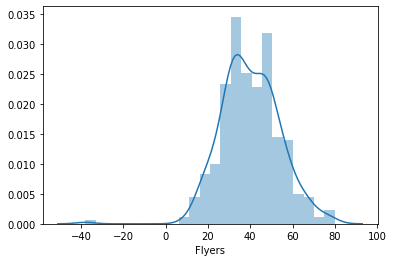

In [228]:
sns.distplot(lemonade["Flyers"])

In [149]:
flyers = pd.DataFrame(lemonade["Flyers"])
flyers["mean"] = flyers["Flyers"].mean()
flyers["centered"] = flyers["Flyers"] - flyers["mean"]

$2\sigma$ on Flyers

In [231]:
flyers2sig = flyers.centered.std()*2
flyers2sig_inlier = flyers[(flyers.centered <= flyers2sig) | (flyers.centered <= flyers2sig*-1)]
flyers2sig_outlier = flyers[~(flyers.centered <= flyers2sig) | (flyers.centered <= flyers2sig*-1)]

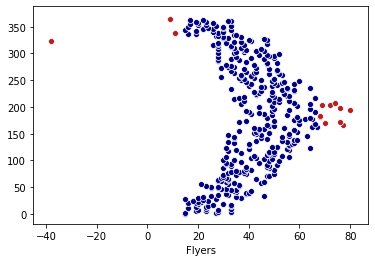

In [249]:
sns.scatterplot(x="Flyers",y=flyers2sig_inlier.index, data=flyers2sig_inlier, color="navy")
sns.scatterplot(x="Flyers",y=flyers2sig_outlier.index, data=flyers2sig_outlier, color="firebrick")

plt.show()

$3\sigma$ on Flyers

In [246]:
flyers3sig = flyers.centered.std()*3
flyers3sig_inlier = flyers[(flyers.centered <= flyers3sig) | (flyers.centered <= flyers3sig*-1)]
flyers3sig_outlier = flyers[~(flyers.centered <= flyers3sig) | (flyers.centered <= flyers3sig*-1)]

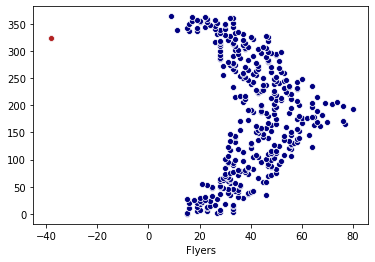

In [250]:
sns.scatterplot(x="Flyers",y=flyers3sig_inlier.index, data=flyers3sig_inlier, color="navy")
sns.scatterplot(x="Flyers",y=flyers3sig_outlier.index, data=flyers3sig_outlier, color="firebrick")

plt.show()

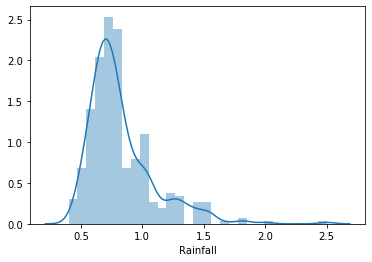

In [227]:
sns.distplot(lemonade["Rainfall"])

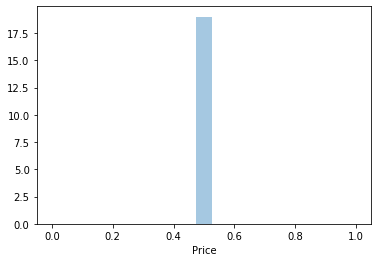

In [125]:
sns.distplot(lemonade["Price"])

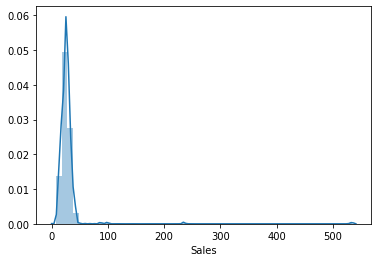

In [126]:
sns.distplot(lemonade["Sales"])